In [1]:
import pandas as pd

# Replace 'path_to_file' with the path to your tab-delimited file
file_path = 'BIOGRID-ALL-4.4.227.tab3.txt'

# Load the tab-delimited file
df = pd.read_csv(file_path, sep='\t')

# Now df is a DataFrame containing the data from your file

print(df.head())

C:\Users\olive\AppData\Local\Temp\ipykernel_16916\2251382396.py:7: DtypeWarning: Columns (1,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


   #BioGRID Interaction ID Entrez Gene Interactor A Entrez Gene Interactor B  \
0                      103                     6416                     2318   
1                      117                    84665                       88   
2                      183                       90                     2339   
3                      278                     2624                     5371   
4                      418                     6118                     6774   

   BioGRID ID Interactor A  BioGRID ID Interactor B  \
0                   112315                   108607   
1                   124185                   106603   
2                   106605                   108625   
3                   108894                   111384   
4                   112038                   112651   

  Systematic Name Interactor A Systematic Name Interactor B  \
0                            -                            -   
1                            -                            -   

In [3]:
df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


In [4]:
df.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology

In [10]:
import json
def load_json(filename):
    with open(filename, "r") as file:
        json_data = json.load(file)
        return json_data

In [11]:
json_data = load_json("compound_ppi_inhibitions_1.json")

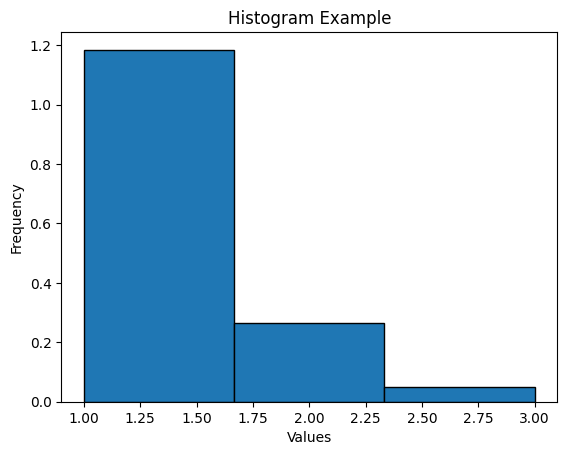

In [32]:
PPI_per_mol = [len(json_data[key]["PPI_VALUES"]) for key in json_data.keys()]
PPI_per_mol

import matplotlib.pyplot as plt

# Create a histogram
plt.hist(PPI_per_mol, bins=3, density=True, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram Example')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

In [36]:
import requests

def retrieve_bioassays(query, record_type='assay'):
    base_url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
    request_url = f"{base_url}/{record_type}/type/all"
    
    try:
        response = requests.get(request_url)
        response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code
        
        # Assuming the response is in JSON format
        if response.status_code == 200:
            return response.json()
        else:
            return f"An error occurred: {response.status_code}"
    except requests.exceptions.HTTPError as err:
        return f"HTTP error occurred: {err}"
    except Exception as err:
        return f"An error occurred: {err}"

# Example usage:
# Replace 'cancer' with your actual search term
bioassays_data = retrieve_bioassays('cancer')
print(bioassays_data)

HTTP error occurred: 400 Client Error: PUGREST.BadRequest for url: https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/type/all


In [43]:
from ftplib import FTP
import os

# Define the directory where files will be saved
save_directory = 'pubchem_assay'

# Ensure the save_directory exists
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to download a file
def grabFile(filename):
    local_filename = os.path.join(save_directory, filename)
    with open(local_filename, 'wb') as local_file:
        ftp.retrbinary('RETR ' + filename, local_file.write)

# Connect to the FTP server
ftp = FTP('ftp.ncbi.nlm.nih.gov')
ftp.login()  # Anonymous login

# Change to the target directory for JSON files
ftp.cwd('/pubchem/Bioassay/JSON/')

# Get a list of files in the directory
files = ftp.nlst('*.zip')  # Adjust pattern as needed

# Download each file
for file in files:
    print(f'Downloading {file} to {save_directory}...')
    grabFile(file)
    print(f'Finished downloading {file}.')

# Close the connection
ftp.quit()
print('All files have been downloaded to the pubchem_assay folder.')


Finished downloading 1919001_1920000.zip.
Finished downloading 1918001_1919000.zip.
Finished downloading 1917001_1918000.zip.
Finished downloading 1916001_1917000.zip.
Finished downloading 1915001_1916000.zip.


KeyboardInterrupt: 